# Data Analysis: 2024 NTCA Legacy T20 - Champions Division
## Batting, Bowling and Fielding Dataset
### 1. Batting Dataset Analysis

In [404]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [405]:
# Reading the Dataset:
batting_df = pd.read_excel("C:\\Users\\SHAIFALI PATWAL\\Downloads\\Internship sheets\\2024 NTCA Legacy T20 - Champions Division.xlsx", sheet_name="Batting", header=0)
batting_df.head()


,# ↓,Player ↓,Group ↓,Team ↓,Mat ↓,Ins ↓,No ↓,Runs ↓,Balls ↓,Avg ↓,Sr ↓,Hs ↓,100's ↓,75's ↓,50's ↓,25's ↓,0 ↓,6's ↓,4's ↓
0,1,Dev Jivnani,D,DCCC 1,7,7,1,404,219,67.33,184.47,108,1,2,2,2,0,21,30
1,2,Thouhidul Islam,D,NDCC Royals,9,9,0,356,196,39.56,181.63,100,1,0,2,3,0,19,36
2,3,Sohan Reddy Angannagari,C,Elite Lions,9,9,2,286,174,40.86,164.37,95,0,1,2,1,0,22,20
3,4,Sujith Gowda,C,Frisco Gryffyns,5,4,2,271,147,135.5,184.35,115,1,0,2,1,0,21,14
4,5,Hemnath Prabhakaran,A,Spartans T20,6,6,0,243,146,40.5,166.44,81,0,1,2,2,0,17,17


In [406]:
# Checking the column names:
batting_df.columns

Index(['# ↓', 'Player  ↓', 'Group  ↓', 'Team  ↓', 'Mat  ↓', 'Ins  ↓', 'No  ↓',
       'Runs  ↓', 'Balls  ↓', 'Avg  ↓', 'Sr  ↓', 'Hs  ↓', '100's  ↓',
       '75's  ↓', '50's  ↓', '25's  ↓', '0  ↓', '6's  ↓', '4's  ↓'],
      dtype='object')

In [407]:
# Removing ↓ symbol from the column names
batting_df.columns=batting_df.columns.str.replace("↓","")
batting_df.columns=batting_df.columns.str.strip()
batting_df.columns

Index(['#', 'Player', 'Group', 'Team', 'Mat', 'Ins', 'No', 'Runs', 'Balls',
       'Avg', 'Sr', 'Hs', '100's', '75's', '50's', '25's', '0', '6's', '4's'],
      dtype='object')

In [408]:
# Setting column 1 as an index
batting_df.set_index(batting_df.columns[0], inplace=True)
batting_df.head(1)

,Player,Group,Team,Mat,Ins,No,Runs,Balls,Avg,Sr,Hs,100's,75's,50's,25's,0,6's,4's
#,,,,,,,,,,,,,,,,,,
1,Dev Jivnani,D,DCCC 1,7,7,1,404,219,67.33,184.47,108,1,2,2,2,0,21,30


In [409]:
# Checking the missing values and data types
batting_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 719 entries, 1 to 719
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  719 non-null    object 
 1   Group   719 non-null    object 
 2   Team    719 non-null    object 
 3   Mat     719 non-null    int64  
 4   Ins     719 non-null    int64  
 5   No      719 non-null    int64  
 6   Runs    719 non-null    int64  
 7   Balls   719 non-null    int64  
 8   Avg     719 non-null    object 
 9   Sr      719 non-null    float64
 10  Hs      719 non-null    int64  
 11  100's   719 non-null    int64  
 12  75's    719 non-null    int64  
 13  50's    719 non-null    int64  
 14  25's    719 non-null    int64  
 15  0       719 non-null    int64  
 16  6's     719 non-null    int64  
 17  4's     719 non-null    int64  
dtypes: float64(1), int64(13), object(4)
memory usage: 106.7+ KB


In [410]:
# Checking data type of Avg Column
batting_df["Avg"].info()

<class 'pandas.core.series.Series'>
Index: 719 entries, 1 to 719
Series name: Avg
Non-Null Count  Dtype 
--------------  ----- 
719 non-null    object
dtypes: object(1)
memory usage: 11.2+ KB


In [411]:
# Converting data type of Avg column from Object to float
batting_df['Avg'] = pd.to_numeric(batting_df['Avg'], errors='coerce')

In [412]:
# Checking the null values in each column
print("\nMissing Values in Batting Dataset:")
batting_df.isnull().sum()
# no null values available in the dataset


Missing Values in Batting Dataset:


Player      0
Group       0
Team        0
Mat         0
Ins         0
No          0
Runs        0
Balls       0
Avg       195
Sr          0
Hs          0
100's       0
75's        0
50's        0
25's        0
0           0
6's         0
4's         0
dtype: int64

In [413]:
batting_df["Avg"].info()

<class 'pandas.core.series.Series'>
Index: 719 entries, 1 to 719
Series name: Avg
Non-Null Count  Dtype  
--------------  -----  
524 non-null    float64
dtypes: float64(1)
memory usage: 11.2 KB


In [414]:
# Filling null values 
batting_df["Avg"]=batting_df["Avg"].fillna(batting_df["Avg"].mean())
batting_df["Avg"]

#
1       67.330000
2       39.560000
3       40.860000
4      135.500000
5       40.500000
          ...    
715      0.000000
716     17.717996
717      0.000000
718      0.000000
719      0.000000
Name: Avg, Length: 719, dtype: float64

In [415]:
# Descriptive Analytics:
batting_df.describe()

,Mat,Ins,No,Runs,Balls,Avg,Sr,Hs,100's,75's,50's,25's,0,6's,4's
count,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000
mean,2.856745,2.144645,0.445063,35.422809,28.315716,17.717996,86.242350,19.737135,0.015299,0.025035,0.143255,0.331015,0.190542,1.386648,2.763561
std,1.993110,1.902555,0.697768,52.775731,36.136181,14.638493,61.546517,23.660355,0.122825,0.165008,0.451313,0.645553,0.439827,2.894744,4.940849
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,3.000000,8.000000,29.285000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,15.000000,15.000000,17.717996,95.650000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4.000000,3.000000,1.000000,46.000000,39.000000,19.500000,131.580000,28.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,3.000000
max,9.000000,9.000000,3.000000,404.000000,219.000000,156.000000,333.330000,129.000000,1.000000,2.000000,3.000000,4.000000,2.000000,23.000000,36.000000


In [416]:
# Checking Unique Team names
batting_df['Team'].unique()

array(['\xa0DCCC 1', '\xa0NDCC Royals', '\xa0Elite Lions',
       '\xa0Frisco Gryffyns', '\xa0Spartans T20', '\xa0DFW Kingsmen 2',
       '\xa0Pcc Reds', '\xa0GPCC Gladiators', '\xa0Frisco Cobras',
       '\xa0McKinney Lazy Cricketers', '\xa0Pcc Googlies',
       '\xa0Lanka Colts Cowboys', '\xa0Hawks', '\xa0Soaring Eagles',
       '\xa0DFW Kingsmen', '\xa0Metroplex', '\xa0FCG Maharajas',
       '\xa0Somerset Stars', '\xa0FCG Badshahz', '\xa0Eagles-Tigers',
       '\xa0Elite Pumas', '\xa0MNCC SunRisers', '\xa0Galacticos T20',
       '\xa0DCCC 2', '\xa0PCA I', '\xa0Pcc Cubs', '\xa0Irving Blues',
       '\xa0Irving Whites'], dtype=object)

In [417]:
# Replacing \xao from the dataset values
batting_df = batting_df.replace(u'\xa0', u'', regex=True)

In [418]:
batting_df['Team'] = batting_df['Team'].str.replace('\xa0', '')
batting_df['Team']=batting_df['Team'].str.strip()
batting_df['Team'].unique()

array(['DCCC 1', 'NDCC Royals', 'Elite Lions', 'Frisco Gryffyns',
       'Spartans T20', 'DFW Kingsmen 2', 'Pcc Reds', 'GPCC Gladiators',
       'Frisco Cobras', 'McKinney Lazy Cricketers', 'Pcc Googlies',
       'Lanka Colts Cowboys', 'Hawks', 'Soaring Eagles', 'DFW Kingsmen',
       'Metroplex', 'FCG Maharajas', 'Somerset Stars', 'FCG Badshahz',
       'Eagles-Tigers', 'Elite Pumas', 'MNCC SunRisers', 'Galacticos T20',
       'DCCC 2', 'PCA I', 'Pcc Cubs', 'Irving Blues', 'Irving Whites'],
      dtype=object)

In [419]:
# Checking the  number of players from each team participating in Champoionship division
batting_df['Team'].value_counts().head(5)

Team
DFW Kingsmen      34
Pcc Googlies      32
DCCC 2            32
Galacticos T20    31
FCG Badshahz      31
Name: count, dtype: int64

c:\Users\SHAIFALI PATWAL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


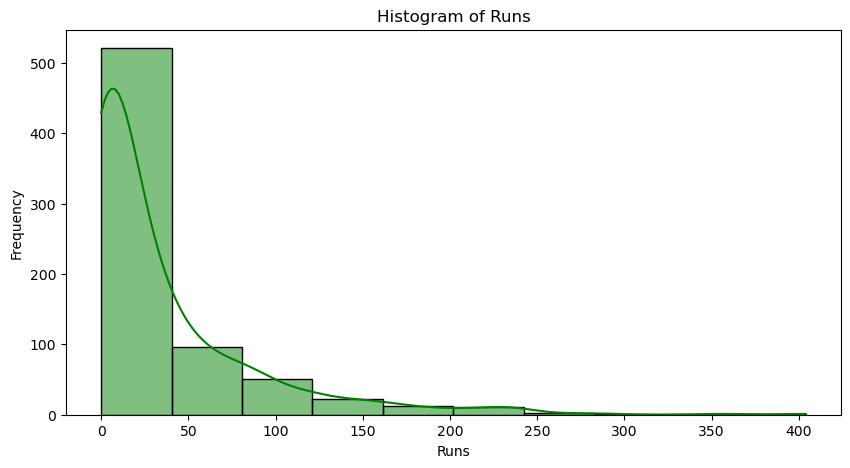

In [420]:
# Data Visualization:

# 1. Histogram of Runs
plt.figure(figsize=(10, 5))
sns.histplot(batting_df['Runs'], bins=10, kde=True, color='green')
plt.title('Histogram of Runs')
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.show()

# The histogram showes the data is skewed to the right which shows
# mean is greater then the median.
# It indicates that most of the data points are clusted on the left side 
# with a few extreme values pulling the average (mean) higher 
# than the median; essentially, the majority of data is smaller
#  than the average value, with a few significantly larger outliers on the right side.


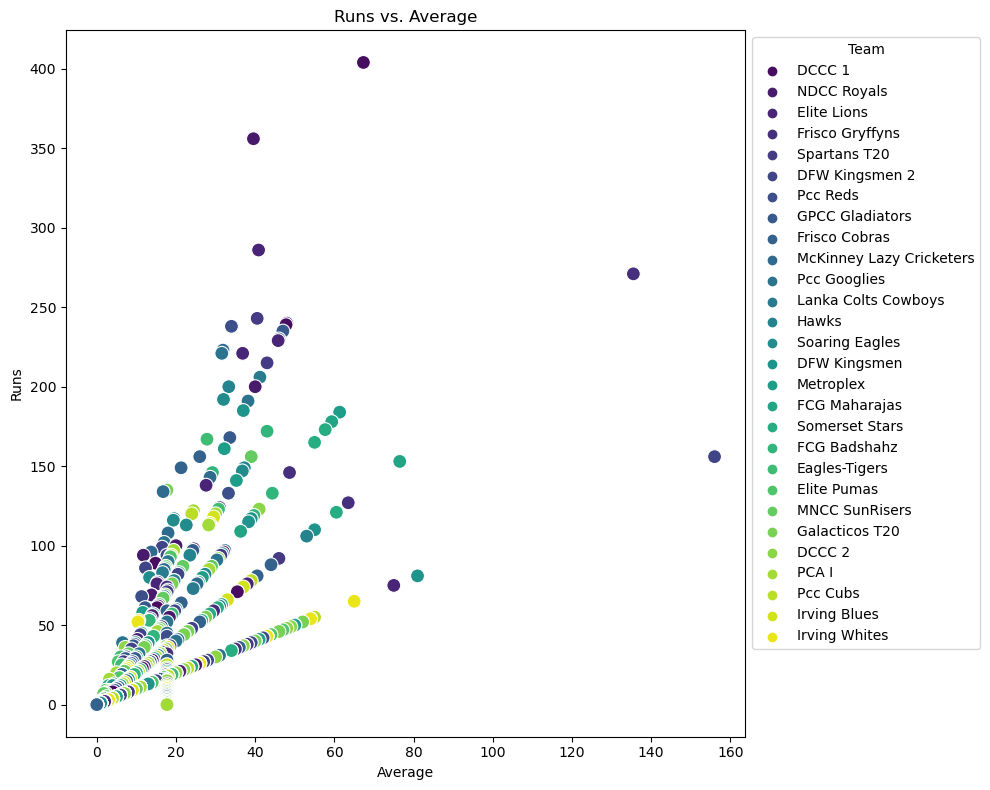

In [421]:
# Scatter Plot: Runs vs. Average in batting data
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Avg', y='Runs', data=batting_df, hue='Team', s=100, palette='viridis')
plt.title('Runs vs. Average')
plt.xlabel('Average')
plt.ylabel('Runs')
plt.legend(title='Team', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout() 
plt.show()

In [422]:
# Maxinmum matches played in the tournament
batting_df['Mat'].max() 


9

In [423]:
# Created a dataframe df of players who played min 4 matches and min 4 innings 
# sorted by the runs scored
df= batting_df[(batting_df['Mat']>=5) & (batting_df['Ins']>=5)][['Player','Team','Mat','Ins','Runs','Balls','Avg']].sort_values("Runs", ascending=False).head(20)
df

,Player,Team,Mat,Ins,Runs,Balls,Avg
#,,,,,,,
1,Dev Jivnani,DCCC 1,7,7,404,219,67.33
2,Thouhidul Islam,NDCC Royals,9,9,356,196,39.56
3,Sohan Reddy Angannagari,Elite Lions,9,9,286,174,40.86
5,Hemnath Prabhakaran,Spartans T20,6,6,243,146,40.50
6,Muhammad Waqas Saleem,DFW Kingsmen 2,5,5,240,176,48.00
7,Aneesh Reddy Musugu,DCCC 1,7,7,239,172,47.80
8,Srikanth Gutlapalli,Pcc Reds,7,7,238,179,34.00
9,Ali Shah,GPCC Gladiators,7,7,235,169,47.00
10,Abhimanyu Poswal,Frisco Cobras,7,7,230,176,46.00


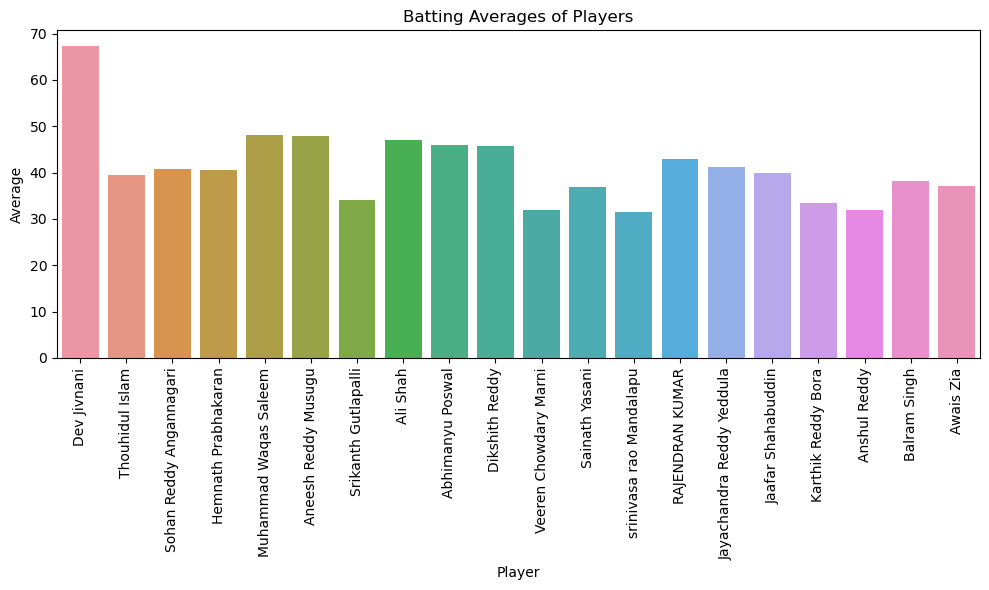

In [424]:
# Visualizing Batting Average of players who played min 4 matches and min 4 innings sorted by runs 
plt.figure(figsize=(10,6))
sns.barplot(x="Player",y="Avg", data=df)
plt.title('Batting Averages of Players')
plt.ylabel('Average')
plt.xlabel('Player')
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.show()

In [425]:
# Feature Engineering
# Calculating boundary percentage:
batting_df["Boundary%"]=((batting_df['6\'s'] * 6) + (batting_df['4\'s'] * 4)) / batting_df['Runs'] * 100
batting_df.head(2)

,Player,Group,Team,Mat,Ins,No,Runs,Balls,Avg,Sr,Hs,100's,75's,50's,25's,0,6's,4's,Boundary%
#,,,,,,,,,,,,,,,,,,,
1,Dev Jivnani,D,DCCC 1,7,7,1,404,219,67.33,184.47,108,1,2,2,2,0,21,30,60.891089
2,Thouhidul Islam,D,NDCC Royals,9,9,0,356,196,39.56,181.63,100,1,0,2,3,0,19,36,72.471910


In [426]:
batting_df.describe()

,Mat,Ins,No,Runs,Balls,Avg,Sr,Hs,100's,75's,50's,25's,0,6's,4's,Boundary%
count,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,561.000000
mean,2.856745,2.144645,0.445063,35.422809,28.315716,17.717996,86.242350,19.737135,0.015299,0.025035,0.143255,0.331015,0.190542,1.386648,2.763561,38.493799
std,1.993110,1.902555,0.697768,52.775731,36.136181,14.638493,61.546517,23.660355,0.122825,0.165008,0.451313,0.645553,0.439827,2.894744,4.940849,27.777900
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,3.000000,8.000000,29.285000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,15.000000,15.000000,17.717996,95.650000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,43.636364
75%,4.000000,3.000000,1.000000,46.000000,39.000000,19.500000,131.580000,28.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,3.000000,60.000000
max,9.000000,9.000000,3.000000,404.000000,219.000000,156.000000,333.330000,129.000000,1.000000,2.000000,3.000000,4.000000,2.000000,23.000000,36.000000,100.000000


## Bowling Data Analysis

In [427]:
bowling_df= pd.read_excel("C:\\Users\\SHAIFALI PATWAL\\Downloads\\Internship sheets\\2024 NTCA Legacy T20 - Champions Division.xlsx", sheet_name="Bowling", header=0)
bowling_df.head(1)

,# ↓,Player ↓,Group ↓,Team ↓,Mat ↓,Inns ↓,Overs ↓,Runs ↓,Wkts ↓,BBf ↓,Mdns ↓,Dots ↓,Econ ↓,Ave ↓,SR ↓,Hat-trick ↓,4W ↓,5W ↓,Wides ↓,Nb ↓
0,1,Naren Reddy Dharma,C,Elite Lions,8,8,28.0,137,16,26/ 4,0,89,4.89,8.56,10.5,0,1,0,4,0


In [428]:
# Replacing ↓ from the column names
bowling_df.columns=bowling_df.columns.str.replace("↓","")
bowling_df.columns=bowling_df.columns.str.strip()
bowling_df.columns

Index(['#', 'Player', 'Group', 'Team', 'Mat', 'Inns', 'Overs', 'Runs', 'Wkts',
       'BBf', 'Mdns', 'Dots', 'Econ', 'Ave', 'SR', 'Hat-trick', '4W', '5W',
       'Wides', 'Nb'],
      dtype='object')

In [429]:
# Setting column 0 as an index
bowling_df.set_index(bowling_df.columns[0], inplace=True)
bowling_df.head(1)

,Player,Group,Team,Mat,Inns,Overs,Runs,Wkts,BBf,Mdns,Dots,Econ,Ave,SR,Hat-trick,4W,5W,Wides,Nb
#,,,,,,,,,,,,,,,,,,,
1,Naren Reddy Dharma,C,Elite Lions,8,8,28.0,137,16,26/ 4,0,89,4.89,8.56,10.5,0,1,0,4,0


In [430]:
# Removing \xa0 from the dataset values
bowling_df = bowling_df.replace(u'\xa0', u'', regex=True)
bowling_df["Mat"].unique()

array([8, 6, 4, 7, 5, 9, 3, 2, 1], dtype=int64)

In [431]:
# Checking  the data type of each column
bowling_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 476 entries, 1 to 476
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Player     476 non-null    object 
 1   Group      476 non-null    object 
 2   Team       476 non-null    object 
 3   Mat        476 non-null    int64  
 4   Inns       476 non-null    int64  
 5   Overs      476 non-null    float64
 6   Runs       476 non-null    int64  
 7   Wkts       476 non-null    int64  
 8   BBf        476 non-null    object 
 9   Mdns       476 non-null    int64  
 10  Dots       476 non-null    int64  
 11  Econ       476 non-null    float64
 12  Ave        476 non-null    float64
 13  SR         476 non-null    float64
 14  Hat-trick  476 non-null    int64  
 15  4W         476 non-null    int64  
 16  5W         476 non-null    int64  
 17  Wides      476 non-null    int64  
 18  Nb         476 non-null    int64  
dtypes: float64(4), int64(11), object(4)
memory usage: 74.4+

In [432]:
# Checking number of null values in each column
bowling_df.isna().sum()

Player       0
Group        0
Team         0
Mat          0
Inns         0
Overs        0
Runs         0
Wkts         0
BBf          0
Mdns         0
Dots         0
Econ         0
Ave          0
SR           0
Hat-trick    0
4W           0
5W           0
Wides        0
Nb           0
dtype: int64

In [433]:
# Checking rows and columns of bowling dataset
bowling_df.shape

(476, 19)

In [434]:
bowling_df['Mat'].max() #Max number of matches played

9

In [435]:
# Creating a dataframe of players who played minimum 5 matches and minimum 4 innings sort by wickets 
# Dataframe b1 include Player name, Overs, Runs, Econ and wikets
b1=bowling_df[(bowling_df["Mat"]>=5) & (bowling_df['Inns']>=4)][["Player","Overs","Runs","Wkts","Econ"]].sort_values("Wkts",ascending=False)
b1.head(5)

,Player,Overs,Runs,Wkts,Econ
#,,,,,
1,Naren Reddy Dharma,28.0,137,16,4.89
3,Siddantham Praneeth Raj,23.0,131,13,5.70
2,Omer Wajihuddin Syed,23.4,134,13,5.66
5,Muhammad Ilyas,20.4,110,12,5.32
6,Abhimanyu Poswal,25.0,164,11,6.56


In [436]:
b1.sort_values(by=["Wkts","Overs"],ascending=False).head()

,Player,Overs,Runs,Wkts,Econ
#,,,,,
1,Naren Reddy Dharma,28.0,137,16,4.89
2,Omer Wajihuddin Syed,23.4,134,13,5.66
3,Siddantham Praneeth Raj,23.0,131,13,5.70
5,Muhammad Ilyas,20.4,110,12,5.32
6,Abhimanyu Poswal,25.0,164,11,6.56


In [437]:
# Creating a dataframe of players who played minimum 4 innings and have econ less than 6
b2= bowling_df[(bowling_df["Inns"]>=5)&(bowling_df["Econ"]<6)][["Player","Mat","Overs","Runs","Wkts","Econ"]].head(10)
b2

,Player,Mat,Overs,Runs,Wkts,Econ
#,,,,,,
1,Naren Reddy Dharma,8,28.0,137,16,4.89
2,Omer Wajihuddin Syed,6,23.4,134,13,5.66
3,Siddantham Praneeth Raj,6,23.0,131,13,5.70
5,Muhammad Ilyas,6,20.4,110,12,5.32
8,Sapan Sharma,5,18.0,99,10,5.50
18,Muhammad Waqas Saleem,6,20.0,114,8,5.70
38,Aasish Jaiswal,6,19.0,102,6,5.37
40,Eshwar Rao Thatipalli,6,21.4,127,6,5.86
55,Aneesh Reddy Musugu,7,13.0,72,5,5.54


In [438]:
bowling_df.describe()

,Mat,Inns,Overs,Runs,Wkts,Mdns,Dots,Econ,Ave,SR,Hat-trick,4W,5W,Wides,Nb
count,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000
mean,3.081933,2.514706,7.056303,56.953782,2.310924,0.065126,16.922269,8.727164,19.311807,14.048319,0.004202,0.042017,0.010504,3.237395,0.231092
std,2.020841,1.733203,5.804541,44.388120,2.611708,0.255389,15.917294,3.227716,20.818176,14.059079,0.091670,0.200839,0.102058,3.436085,0.592195
min,1.000000,1.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,3.000000,21.000000,0.000000,0.000000,5.000000,6.600000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,3.000000,2.000000,5.000000,43.000000,1.000000,0.000000,11.000000,8.260000,15.000000,12.000000,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.000000,4.000000,10.000000,82.000000,3.000000,0.000000,24.000000,10.250000,28.177500,20.250000,0.000000,0.000000,0.000000,5.000000,0.000000
max,9.000000,9.000000,28.000000,210.000000,16.000000,2.000000,89.000000,24.000000,158.000000,96.000000,2.000000,1.000000,1.000000,18.000000,4.000000


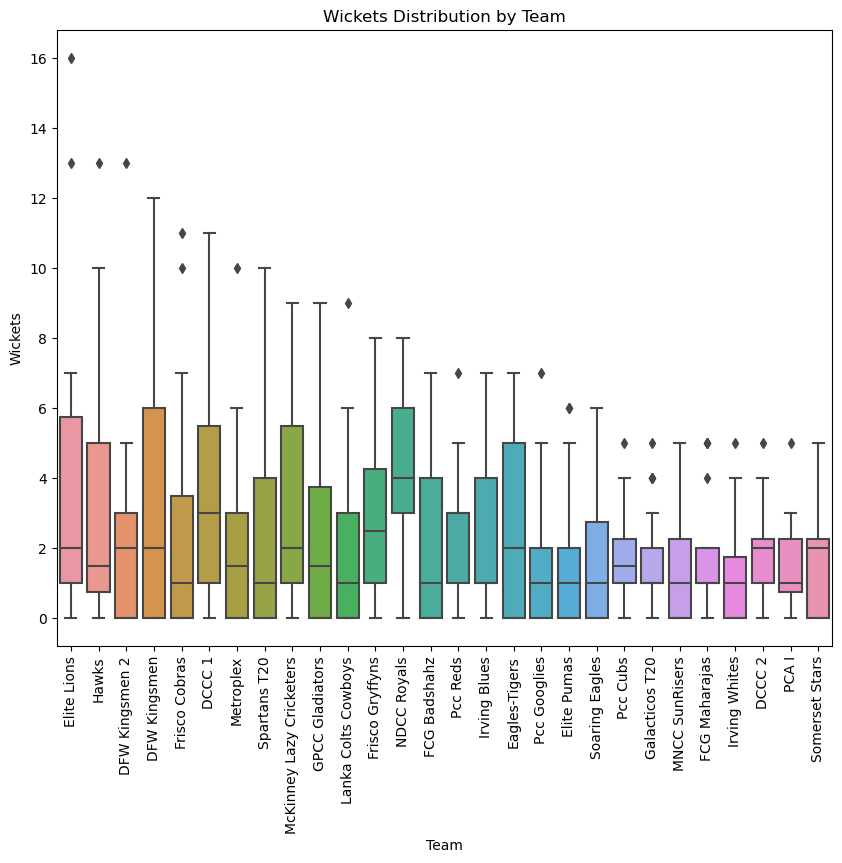

In [439]:
# Box Plot: Wickets Distribution by Team in bowling data
plt.figure(figsize=(10, 8))
sns.boxplot(x='Team', y='Wkts', data=bowling_df)
plt.title('Wickets Distribution by Team')
plt.xlabel('Team')
plt.ylabel('Wickets')
plt.xticks(rotation=90)
plt.show()

In [440]:
# Bowling: Calculating the efficiency ratio (wickets per run given)
bowling_df['Efficiency'] = bowling_df['Wkts'] / bowling_df['Runs']
bowling_df.head(2)

,Player,Group,Team,Mat,Inns,Overs,Runs,Wkts,BBf,Mdns,Dots,Econ,Ave,SR,Hat-trick,4W,5W,Wides,Nb,Efficiency
#,,,,,,,,,,,,,,,,,,,,
1,Naren Reddy Dharma,C,Elite Lions,8,8,28.0,137,16,26/4,0,89,4.89,8.56,10.5,0,1,0,4,0,0.116788
2,Omer Wajihuddin Syed,A,Hawks,6,6,23.4,134,13,12/4,1,79,5.66,10.31,10.9,0,1,0,8,1,0.097015


In [441]:
# Summary statistics
bowling_df.describe()

c:\Users\SHAIFALI PATWAL\anaconda3\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Mat,Inns,Overs,Runs,Wkts,Mdns,Dots,Econ,Ave,SR,Hat-trick,4W,5W,Wides,Nb,Efficiency
count,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000
mean,3.081933,2.514706,7.056303,56.953782,2.310924,0.065126,16.922269,8.727164,19.311807,14.048319,0.004202,0.042017,0.010504,3.237395,0.231092,inf
std,2.020841,1.733203,5.804541,44.388120,2.611708,0.255389,15.917294,3.227716,20.818176,14.059079,0.091670,0.200839,0.102058,3.436085,0.592195,NaN
min,1.000000,1.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,3.000000,21.000000,0.000000,0.000000,5.000000,6.600000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,3.000000,2.000000,5.000000,43.000000,1.000000,0.000000,11.000000,8.260000,15.000000,12.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.031746
75%,5.000000,4.000000,10.000000,82.000000,3.000000,0.000000,24.000000,10.250000,28.177500,20.250000,0.000000,0.000000,0.000000,5.000000,0.000000,0.062500
max,9.000000,9.000000,28.000000,210.000000,16.000000,2.000000,89.000000,24.000000,158.000000,96.000000,2.000000,1.000000,1.000000,18.000000,4.000000,inf


## 3. Fielding Data Analysis

In [442]:
fielding_df= pd.read_excel("C:\\Users\\SHAIFALI PATWAL\\Downloads\\Internship sheets\\2024 NTCA Legacy T20 - Champions Division.xlsx", sheet_name="Fielding", header=0)
fielding_df.head(10)

,# ↓,Player ↓,Group ↓,Team ↓,Catches ↓,WK Catches ↓,Direct RO ↓,Indirect RO ↓,Stumpings ↓,Total ↓
0,1,Saikiran Valaboju,B,Frisco Cobras,11,0,0,0,0,11
1,2,Sainath Yasani,C,Elite Lions,0,7,0,0,4,11
2,3,Thouhidul Islam,D,NDCC Royals,2,5,1,0,2,10
3,4,Kireeti Eluri,A,Pcc Googlies,0,4,0,4,2,10
4,5,Ali Sheikh,D,DFW Kingsmen,8,0,1,0,0,9
5,6,Shashank Singh,B,FCG Badshahz,1,6,0,0,2,9
6,7,Sharath Dwaram,A,Hawks,0,5,0,0,4,9
7,8,Dikshith Reddy,C,Elite Lions,7,0,1,0,0,8
8,9,Naeem Qureshi,D,DFW Kingsmen,0,6,0,0,2,8
9,10,Koushik Jayakumar,B,Frisco Cobras,1,4,0,0,2,7


In [443]:
fielding_df.columns=fielding_df.columns.str.replace('↓','')
fielding_df.columns=fielding_df.columns.str.strip()
fielding_df.columns

Index(['#', 'Player', 'Group', 'Team', 'Catches', 'WK Catches', 'Direct RO',
       'Indirect RO', 'Stumpings', 'Total'],
      dtype='object')

In [444]:
fielding_df.set_index(fielding_df.columns[0], inplace=True)
fielding_df.head(1)

,Player,Group,Team,Catches,WK Catches,Direct RO,Indirect RO,Stumpings,Total
#,,,,,,,,,
1,Saikiran Valaboju,B,Frisco Cobras,11,0,0,0,0,11


In [445]:
fielding_df = fielding_df.replace(u'\xa0', u'', regex=True)
fielding_df["Team"].unique()

array(['Frisco Cobras', 'Elite Lions', 'NDCC Royals', 'Pcc Googlies',
       'DFW Kingsmen', 'FCG Badshahz', 'Hawks', 'DCCC 1', 'Spartans T20',
       'DFW Kingsmen 2', 'DCCC 2', 'Metroplex', 'Elite Pumas',
       'McKinney Lazy Cricketers', 'Irving Whites', 'PCA I',
       'GPCC Gladiators', 'Pcc Reds', 'Lanka Colts Cowboys',
       'FCG Maharajas', 'Irving Blues', 'Somerset Stars',
       'Frisco Gryffyns', 'Eagles-Tigers', 'Galacticos T20', 'Pcc Cubs',
       'Soaring Eagles', 'MNCC SunRisers'], dtype=object)

In [446]:
fielding_df.shape

(719, 9)

In [447]:
fielding_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 719 entries, 1 to 719
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Player       719 non-null    object
 1   Group        719 non-null    object
 2   Team         719 non-null    object
 3   Catches      719 non-null    int64 
 4   WK Catches   719 non-null    int64 
 5   Direct RO    719 non-null    int64 
 6   Indirect RO  719 non-null    int64 
 7   Stumpings    719 non-null    int64 
 8   Total        719 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 56.2+ KB


In [448]:
fielding_df.isna().sum()

Player         0
Group          0
Team           0
Catches        0
WK Catches     0
Direct RO      0
Indirect RO    0
Stumpings      0
Total          0
dtype: int64

In [449]:
fielding_df.columns

Index(['Player', 'Group', 'Team', 'Catches', 'WK Catches', 'Direct RO',
       'Indirect RO', 'Stumpings', 'Total'],
      dtype='object')

In [450]:
# Varifying if Total column is equal to the sum of Catches,WK Catches,Direct RO, Indirect RO and Stumping
fielding_df["Calculated_Total"]=fielding_df["Catches"]+fielding_df["WK Catches"]+fielding_df["Direct RO"]+fielding_df["Indirect RO"]+fielding_df["Stumpings"]
fielding_df.head(3)

,Player,Group,Team,Catches,WK Catches,Direct RO,Indirect RO,Stumpings,Total,Calculated_Total
#,,,,,,,,,,
1,Saikiran Valaboju,B,Frisco Cobras,11,0,0,0,0,11,11
2,Sainath Yasani,C,Elite Lions,0,7,0,0,4,11,11
3,Thouhidul Islam,D,NDCC Royals,2,5,1,0,2,10,10


In [451]:
# Check if there are discrepancies
discrepancies = fielding_df[fielding_df['Total'] != fielding_df['Calculated_Total']]
discrepancies
# both are same so we'll drop the new column

,Player,Group,Team,Catches,WK Catches,Direct RO,Indirect RO,Stumpings,Total,Calculated_Total
#,,,,,,,,,,


In [452]:
# Removing Calculated_Total column from the dataset
fielding_df=fielding_df.drop("Calculated_Total",axis=1)

In [453]:
# Checking the max number of catches
fielding_df['Catches'].max()

11

In [454]:
# Checking the maximum numbers of wicket keeper catches
fielding_df['WK Catches'].max()

7

In [455]:
# Players with catches more than 2 and total more than 5
fdf= fielding_df[(fielding_df['Catches']>=3) & (fielding_df['Total']>=6)][["Player","Catches","Total"]]
fdf

,Player,Catches,Total
#,,,
1,Saikiran Valaboju,11,11
5,Ali Sheikh,8,9
8,Dikshith Reddy,7,8
12,Naren Reddy Dharma,4,7
14,Abdullah Khan,6,6
15,Viral Nai,6,6
16,Baswant Rao,6,6
17,Muhammad Waqas Saleem,6,6
18,Awais Zia,6,6


In [456]:
# Sorting values by Total wickets
fielding_df.sort_values(by="Total", ascending=False).head(10)

,Player,Group,Team,Catches,WK Catches,Direct RO,Indirect RO,Stumpings,Total
#,,,,,,,,,
1,Saikiran Valaboju,B,Frisco Cobras,11,0,0,0,0,11
2,Sainath Yasani,C,Elite Lions,0,7,0,0,4,11
3,Thouhidul Islam,D,NDCC Royals,2,5,1,0,2,10
4,Kireeti Eluri,A,Pcc Googlies,0,4,0,4,2,10
5,Ali Sheikh,D,DFW Kingsmen,8,0,1,0,0,9
6,Shashank Singh,B,FCG Badshahz,1,6,0,0,2,9
7,Sharath Dwaram,A,Hawks,0,5,0,0,4,9
9,Naeem Qureshi,D,DFW Kingsmen,0,6,0,0,2,8
8,Dikshith Reddy,C,Elite Lions,7,0,1,0,0,8


In [457]:
# Summary statistics
fielding_df.describe()

,Catches,WK Catches,Direct RO,Indirect RO,Stumpings,Total
count,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000
mean,0.884562,0.141864,0.116829,0.077886,0.068150,1.289291
std,1.285996,0.685636,0.366011,0.320251,0.394355,1.728762
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,11.000000,7.000000,3.000000,4.000000,4.000000,11.000000


c:\Users\SHAIFALI PATWAL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


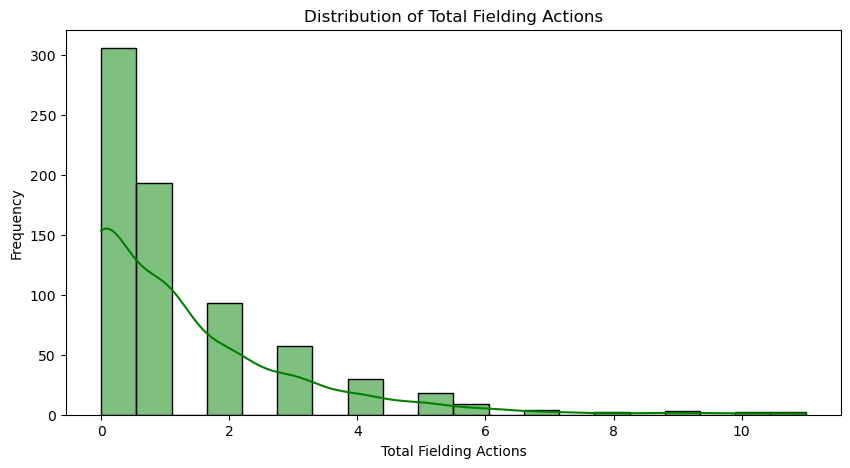

In [458]:
# Histogram of Total fielding actions
plt.figure(figsize=(10, 5))
sns.histplot(fielding_df['Total'], bins=20, kde=True, color='green')
plt.title('Distribution of Total Fielding Actions')
plt.xlabel('Total Fielding Actions')
plt.ylabel('Frequency')
plt.show()

In [459]:
# Checking number of wickets taken by NDCC Royals team
fielding_df[fielding_df["Team"]=='NDCC Royals']['Total'].sum()

49

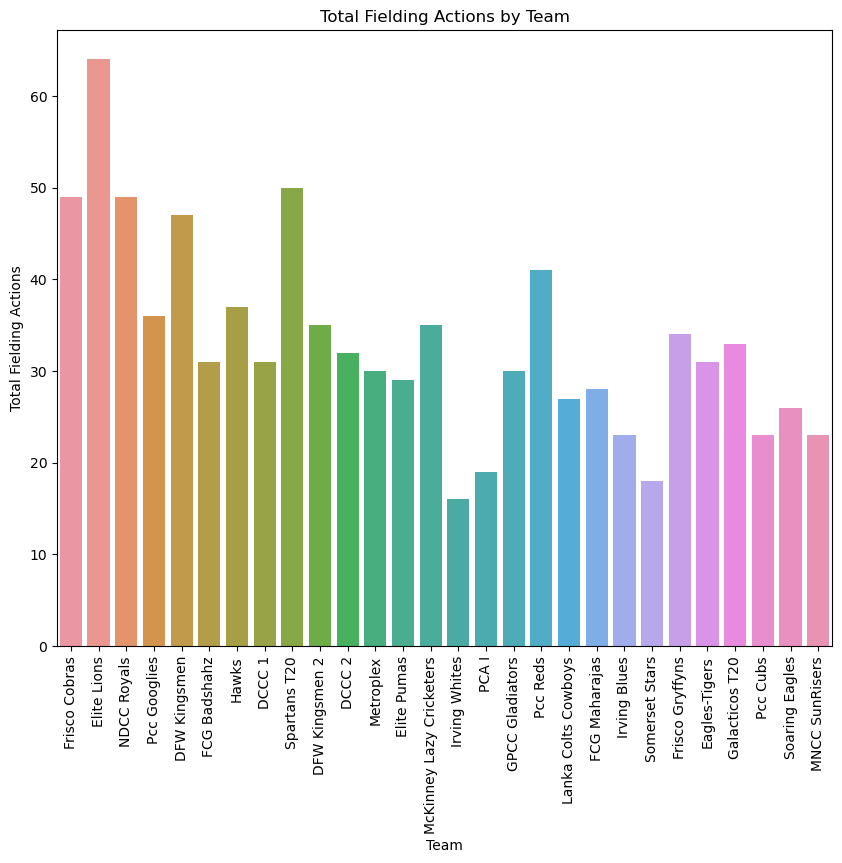

In [460]:
# bar plot of total fielding actions by team: total wickets taken by each team
plt.figure(figsize=(10,8))
sns.barplot(x="Team",y="Total", data=fielding_df, estimator=sum, errorbar=None)
plt.title('Total Fielding Actions by Team')
plt.xlabel('Team')
plt.ylabel('Total Fielding Actions')
plt.xticks(rotation=90)
plt.show()

In [461]:
# Creating new features: 
# Fielding Efficiency and Keeper Contribution

fielding_df['Fielding_Efficiency'] = (fielding_df['Catches'] + fielding_df['Direct RO'] + fielding_df['Indirect RO'] + fielding_df['Stumpings']) / fielding_df['Total']
fielding_df['Keeper Contribution'] = fielding_df['WK Catches'] + fielding_df['Stumpings']
fielding_df.head()

,Player,Group,Team,Catches,WK Catches,Direct RO,Indirect RO,Stumpings,Total,Fielding_Efficiency,Keeper Contribution
#,,,,,,,,,,,
1,Saikiran Valaboju,B,Frisco Cobras,11,0,0,0,0,11,1.000000,0
2,Sainath Yasani,C,Elite Lions,0,7,0,0,4,11,0.363636,11
3,Thouhidul Islam,D,NDCC Royals,2,5,1,0,2,10,0.500000,7
4,Kireeti Eluri,A,Pcc Googlies,0,4,0,4,2,10,0.600000,6
5,Ali Sheikh,D,DFW Kingsmen,8,0,1,0,0,9,1.000000,0


In [462]:
fielding_df["Fielding_Efficiency"].max()

1.0

In [463]:
fielding_df.describe()

,Catches,WK Catches,Direct RO,Indirect RO,Stumpings,Total,Fielding_Efficiency,Keeper Contribution
count,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,413.000000,719.000000
mean,0.884562,0.141864,0.116829,0.077886,0.068150,1.289291,0.922486,0.210014
std,1.285996,0.685636,0.366011,0.320251,0.394355,1.728762,0.239933,0.982640
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000
max,11.000000,7.000000,3.000000,4.000000,4.000000,11.000000,1.000000,11.000000


### Merging Datasets:


In [464]:
cric_df=pd.merge(batting_df, bowling_df, on=["Player","Team","Group"], how='outer')
cric_df.columns

Index(['Player', 'Group', 'Team', 'Mat_x', 'Ins', 'No', 'Runs_x', 'Balls',
       'Avg', 'Sr', 'Hs', '100's', '75's', '50's', '25's', '0', '6's', '4's',
       'Boundary%', 'Mat_y', 'Inns', 'Overs', 'Runs_y', 'Wkts', 'BBf', 'Mdns',
       'Dots', 'Econ', 'Ave', 'SR', 'Hat-trick', '4W', '5W', 'Wides', 'Nb',
       'Efficiency'],
      dtype='object')

In [465]:
# Checking if Mat_x and Mat_y are same 
(cric_df["Mat_x"]==cric_df["Mat_y"]).all()

False

In [466]:
# Checking if Runs_x and Runs_y are same 
(cric_df["Runs_x"]==cric_df["Runs_y"]).all()

False

In [467]:
# Combining Mat_x and Mat_y
cric_df["Mat"]=cric_df['Mat_x'].combine_first(cric_df['Mat_y'])

C:\Users\SHAIFALI PATWAL\AppData\Local\Temp\ipykernel_19164\4222638150.py:2: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  cric_df["Mat"]=cric_df['Mat_x'].combine_first(cric_df['Mat_y'])


In [468]:
# Checking Max number of match played to 
# varify if the columns are combined properly 
cric_df['Mat'].max()

9

In [469]:
# Dropping Mat_x and Mat_y
cric_df=cric_df.drop(["Mat_x","Mat_y"], axis=1)
cric_df.columns

Index(['Player', 'Group', 'Team', 'Ins', 'No', 'Runs_x', 'Balls', 'Avg', 'Sr',
       'Hs', '100's', '75's', '50's', '25's', '0', '6's', '4's', 'Boundary%',
       'Inns', 'Overs', 'Runs_y', 'Wkts', 'BBf', 'Mdns', 'Dots', 'Econ', 'Ave',
       'SR', 'Hat-trick', '4W', '5W', 'Wides', 'Nb', 'Efficiency', 'Mat'],
      dtype='object')

In [470]:
# Renaming Runs_x as Runs_Scored, Runs_y as Runs_given, Avg as Batting_Avg and Ave as Bowling_Avg
cric_df.rename(columns={"Runs_x":"Runs_scored","Runs_y":"Runs_given","Avg":"Batting_Avg","Ave":"Bowling_Avg"}, inplace=True)

In [471]:
cric_df.columns

Index(['Player', 'Group', 'Team', 'Ins', 'No', 'Runs_scored', 'Balls',
       'Batting_Avg', 'Sr', 'Hs', '100's', '75's', '50's', '25's', '0', '6's',
       '4's', 'Boundary%', 'Inns', 'Overs', 'Runs_given', 'Wkts', 'BBf',
       'Mdns', 'Dots', 'Econ', 'Bowling_Avg', 'SR', 'Hat-trick', '4W', '5W',
       'Wides', 'Nb', 'Efficiency', 'Mat'],
      dtype='object')

In [472]:
# Merging cric_df and fielding_df datasets
cric_df=pd.merge(cric_df,fielding_df, on=['Player',"Team","Group"], how='outer')
cric_df.columns

Index(['Player', 'Group', 'Team', 'Ins', 'No', 'Runs_scored', 'Balls',
       'Batting_Avg', 'Sr', 'Hs', '100's', '75's', '50's', '25's', '0', '6's',
       '4's', 'Boundary%', 'Inns', 'Overs', 'Runs_given', 'Wkts', 'BBf',
       'Mdns', 'Dots', 'Econ', 'Bowling_Avg', 'SR', 'Hat-trick', '4W', '5W',
       'Wides', 'Nb', 'Efficiency', 'Mat', 'Catches', 'WK Catches',
       'Direct RO', 'Indirect RO', 'Stumpings', 'Total', 'Fielding_Efficiency',
       'Keeper Contribution'],
      dtype='object')

In [473]:
# Checking number of rows and columns
cric_df.shape

(770, 43)

In [474]:
cric_df.head(2)

,Player,Group,Team,Ins,No,Runs_scored,Balls,Batting_Avg,Sr,Hs,...,Efficiency,Mat,Catches,WK Catches,Direct RO,Indirect RO,Stumpings,Total,Fielding_Efficiency,Keeper Contribution
0,Aadyanth Masthipuram,B,Pcc Reds,0,0,0,0,17.717996,0.00,0,...,0.000000,1,1,0,0,0,0,1,1.0,0
1,Aakarshit Gomel,C,Elite Lions,2,1,75,56,75.000000,133.93,50,...,0.122807,4,1,0,0,0,0,1,1.0,0


In [475]:
# Checking null values present in the dataset cric_df
cric_df.isnull().sum()

Player                   0
Group                    0
Team                     0
Ins                      0
No                       0
Runs_scored              0
Balls                    0
Batting_Avg              0
Sr                       0
Hs                       0
100's                    0
75's                     0
50's                     0
25's                     0
0                        0
6's                      0
4's                      0
Boundary%              168
Inns                   242
Overs                  242
Runs_given             242
Wkts                   242
BBf                    242
Mdns                   242
Dots                   242
Econ                   242
Bowling_Avg            242
SR                     242
Hat-trick              242
4W                     242
5W                     242
Wides                  242
Nb                     242
Efficiency             242
Mat                      0
Catches                  0
WK Catches               0
D

In [476]:
# Fill the null with 0
cric_df.fillna(0,inplace=True)

In [477]:
cric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Player               770 non-null    object 
 1   Group                770 non-null    object 
 2   Team                 770 non-null    object 
 3   Ins                  770 non-null    int64  
 4   No                   770 non-null    int64  
 5   Runs_scored          770 non-null    int64  
 6   Balls                770 non-null    int64  
 7   Batting_Avg          770 non-null    float64
 8   Sr                   770 non-null    float64
 9   Hs                   770 non-null    int64  
 10  100's                770 non-null    int64  
 11  75's                 770 non-null    int64  
 12  50's                 770 non-null    int64  
 13  25's                 770 non-null    int64  
 14  0                    770 non-null    int64  
 15  6's                  770 non-null    int

In [478]:
cric_df.describe()

c:\Users\SHAIFALI PATWAL\anaconda3\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Ins,No,Runs_scored,Balls,Batting_Avg,Sr,Hs,100's,75's,50's,...,Efficiency,Mat,Catches,WK Catches,Direct RO,Indirect RO,Stumpings,Total,Fielding_Efficiency,Keeper Contribution
count,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,...,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000
mean,2.085714,0.431169,34.576623,27.655844,17.672007,86.088740,19.659740,0.014286,0.023377,0.146753,...,inf,2.785714,0.848052,0.133766,0.112987,0.074026,0.063636,1.232468,0.512320,0.197403
std,1.864856,0.685017,51.428261,35.272998,14.580174,61.357665,23.463023,0.118743,0.159564,0.448110,...,NaN,1.963795,1.260185,0.664169,0.359110,0.311839,0.381432,1.695012,0.492227,0.951349
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,3.000000,8.000000,28.927500,1.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,15.000000,15.000000,17.717996,96.530000,11.000000,0.000000,0.000000,0.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.666667,0.000000
75%,3.000000,1.000000,47.000000,38.750000,19.382500,132.045000,28.000000,0.000000,0.000000,0.000000,...,0.046716,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000
max,9.000000,3.000000,404.000000,219.000000,156.000000,333.330000,129.000000,1.000000,2.000000,3.000000,...,inf,9.000000,11.000000,7.000000,3.000000,4.000000,4.000000,11.000000,1.000000,11.000000


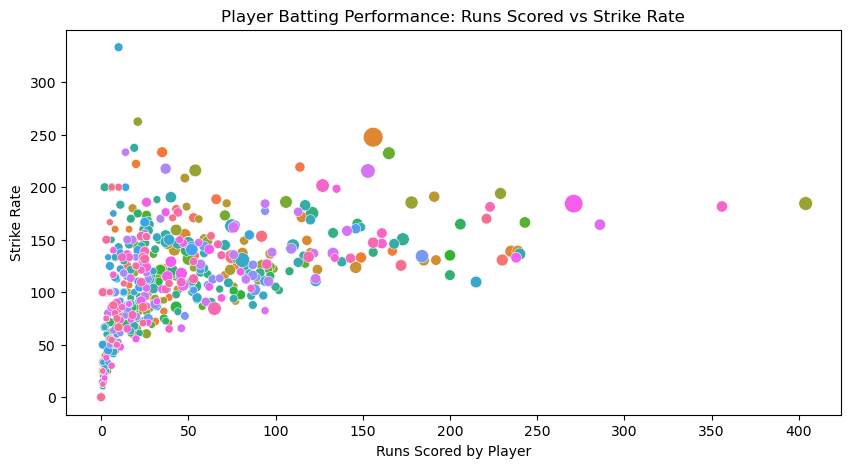

In [479]:
# Visualizing the merged dataset cric_df
# Scatter plot of Economy rate vs strike rate
plt.figure(figsize=(10,5))
sns.scatterplot(data=cric_df, x='Runs_scored',y='Sr', hue='Player',size="Batting_Avg", sizes=(20,200),legend=False)
plt.xlabel("Runs Scored by Player")
plt.ylabel("Strike Rate")
plt.title("Player Batting Performance: Runs Scored vs Strike Rate")
plt.show()

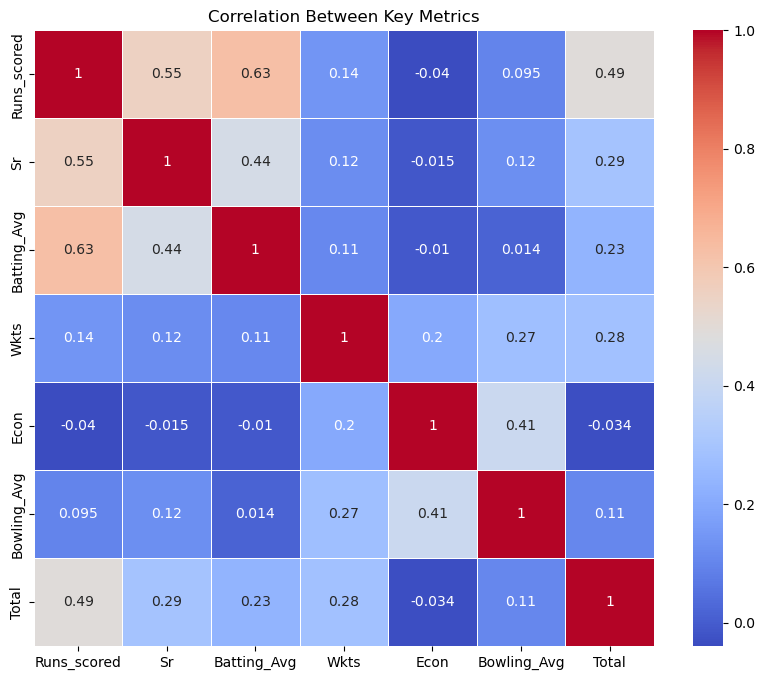

In [480]:
# Correlation matrix for batting, bowling, and fielding metrics
plt.figure(figsize=(10, 8))
corr_matrix = cric_df[['Runs_scored', 'Sr', 'Batting_Avg', 'Wkts', 'Econ', 'Bowling_Avg', 'Total']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Key Metrics')
plt.show()

In [481]:
cric_df.columns

Index(['Player', 'Group', 'Team', 'Ins', 'No', 'Runs_scored', 'Balls',
       'Batting_Avg', 'Sr', 'Hs', '100's', '75's', '50's', '25's', '0', '6's',
       '4's', 'Boundary%', 'Inns', 'Overs', 'Runs_given', 'Wkts', 'BBf',
       'Mdns', 'Dots', 'Econ', 'Bowling_Avg', 'SR', 'Hat-trick', '4W', '5W',
       'Wides', 'Nb', 'Efficiency', 'Mat', 'Catches', 'WK Catches',
       'Direct RO', 'Indirect RO', 'Stumpings', 'Total', 'Fielding_Efficiency',
       'Keeper Contribution'],
      dtype='object')

In [482]:
# Batting Efficiency
cric_df['Batting_Efficiency']=cric_df["Batting_Avg"]*cric_df["Sr"]

In [483]:
# Bowling Efficiency
cric_df['Bowling_Efficiency'] = cric_df['Wkts'] / cric_df['Econ']

In [484]:
# Overall Player Performance Index:
# Weighted combination of batting, bowling, and fielding metrics.
cric_df['Performance_Index'] = (cric_df['Batting_Efficiency'] + cric_df['Bowling_Efficiency'] + cric_df['Total']) / 3


In [485]:
cric_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Player               770 non-null    object 
 1   Group                770 non-null    object 
 2   Team                 770 non-null    object 
 3   Ins                  770 non-null    int64  
 4   No                   770 non-null    int64  
 5   Runs_scored          770 non-null    int64  
 6   Balls                770 non-null    int64  
 7   Batting_Avg          770 non-null    float64
 8   Sr                   770 non-null    float64
 9   Hs                   770 non-null    int64  
 10  100's                770 non-null    int64  
 11  75's                 770 non-null    int64  
 12  50's                 770 non-null    int64  
 13  25's                 770 non-null    int64  
 14  0                    770 non-null    int64  
 15  6's                  770 non-null    int

In [486]:
# Checking null values in each column
cric_df.isna().sum()

Player                   0
Group                    0
Team                     0
Ins                      0
No                       0
Runs_scored              0
Balls                    0
Batting_Avg              0
Sr                       0
Hs                       0
100's                    0
75's                     0
50's                     0
25's                     0
0                        0
6's                      0
4's                      0
Boundary%                0
Inns                     0
Overs                    0
Runs_given               0
Wkts                     0
BBf                      0
Mdns                     0
Dots                     0
Econ                     0
Bowling_Avg              0
SR                       0
Hat-trick                0
4W                       0
5W                       0
Wides                    0
Nb                       0
Efficiency               0
Mat                      0
Catches                  0
WK Catches               0
D

In [487]:
# Checking the total number of null values in Bowling_Efficiency column
# As We calculted Bowling Efficiency by dividing Wkts by Econ, therefore, checking the values of Wkts and Econ to find out the reason behind NaN value.


cric_df[(cric_df['Bowling_Efficiency'].isna()) | (cric_df['Bowling_Efficiency']==" ")][["Wkts","Econ","Bowling_Efficiency"]].head()



# Here we can observe that the bowling efficiency is NaN because values are divided by zero. 
# Therefore, we are going to fill na by 0
# We can also observe that the wkts and econ are zero because the player might be a batsman or fielder.
# There are 240 players who are not bowler in the dataset

,Wkts,Econ,Bowling_Efficiency
4,0.0,0.0,NaN
7,0.0,0.0,NaN
8,0.0,0.0,NaN
11,0.0,0.0,NaN
12,0.0,0.0,NaN


In [488]:
# Filling na values by 0
cric_df["Bowling_Efficiency"].fillna(0,inplace=True)

C:\Users\SHAIFALI PATWAL\AppData\Local\Temp\ipykernel_19164\3370084303.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cric_df["Bowling_Efficiency"].fillna(0,inplace=True)


In [489]:
# cric_df['Performance_Index'] = (cric_df['Batting_Efficiency'] + cric_df['Bowling_Efficiency'] + cric_df['Total']) / 3
# There are 240 values which are null
cric_df[(cric_df['Performance_Index'].isna()) | (cric_df['Performance_Index']==" ")][["Batting_Efficiency","Bowling_Efficiency","Total","Performance_Index"]]



,Batting_Efficiency,Bowling_Efficiency,Total,Performance_Index
4,1771.799618,0.0,0,NaN
7,50.000000,0.0,3,NaN
8,0.000000,0.0,0,NaN
11,40.000000,0.0,0,NaN
12,125.470500,0.0,1,NaN
...,...,...,...,...
754,564.720000,0.0,1,NaN
755,277.800000,0.0,0,NaN
756,327.300000,0.0,0,NaN
760,675.000000,0.0,0,NaN


In [490]:
# Checking the Data type of "Batting_Efficiency","Bowling_Efficiency","Total"
cric_df[["Batting_Efficiency","Bowling_Efficiency","Total"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Batting_Efficiency  770 non-null    float64
 1   Bowling_Efficiency  770 non-null    float64
 2   Total               770 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 18.2 KB


In [491]:
# Converting data type of "Total"
cric_df['Total'] = cric_df['Total'].astype(float)
cric_df["Total"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 770 entries, 0 to 769
Series name: Total
Non-Null Count  Dtype  
--------------  -----  
770 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


In [492]:
# Now again creating doing the feature engineering and creating Performance_Index column. 
cric_df['Performance_Index'] = (cric_df['Batting_Efficiency'] + cric_df['Bowling_Efficiency'] + cric_df['Total']) / 3


In [493]:
# Now we can see no null values are present here.
cric_df[(cric_df['Performance_Index'].isna()) | (cric_df['Performance_Index']==" ")][["Batting_Efficiency","Bowling_Efficiency","Total","Performance_Index"]]


,Batting_Efficiency,Bowling_Efficiency,Total,Performance_Index


In [494]:
cric_df['Performance_Index'].isna().sum()

0

In [495]:
cric_df.columns

Index(['Player', 'Group', 'Team', 'Ins', 'No', 'Runs_scored', 'Balls',
       'Batting_Avg', 'Sr', 'Hs', '100's', '75's', '50's', '25's', '0', '6's',
       '4's', 'Boundary%', 'Inns', 'Overs', 'Runs_given', 'Wkts', 'BBf',
       'Mdns', 'Dots', 'Econ', 'Bowling_Avg', 'SR', 'Hat-trick', '4W', '5W',
       'Wides', 'Nb', 'Efficiency', 'Mat', 'Catches', 'WK Catches',
       'Direct RO', 'Indirect RO', 'Stumpings', 'Total', 'Fielding_Efficiency',
       'Keeper Contribution', 'Batting_Efficiency', 'Bowling_Efficiency',
       'Performance_Index'],
      dtype='object')

## Applying Machine Learning Models

In [496]:
# Import Packages for predictive modeling:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm


In [497]:
# Defining x and y
X = cric_df[['Runs_scored','Wkts','Catches','Econ','Sr']]
y=cric_df['Performance_Index']

In [498]:
# As our predictive model getting infinity values in y variable error, we are checking how many infinity values do we have
import numpy as np
np.isinf(cric_df["Performance_Index"]).sum()

1

In [499]:
# Fixing this issue:
# Replace infinite values with NaN for further imputation
cric_df["Performance_Index"].replace([np.inf, -np.inf], np.nan, inplace=True)

In [500]:
# Replacing this NaN value with median 
cric_df["Performance_Index"]= cric_df["Performance_Index"].fillna(cric_df["Performance_Index"].median(), inplace=True)

In [501]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a constant to X_train for the intercept
X_train_const = sm.add_constant(X_train)

# Fit the model using OLS (Ordinary Least Squares) from statsmodels
model = sm.OLS(y_train, X_train_const).fit()


In [502]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Performance_Index   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     151.8
Date:                Mon, 30 Sep 2024   Prob (F-statistic):          1.41e-104
Time:                        11:02:37   Log-Likelihood:                -4843.2
No. Observations:                 616   AIC:                             9698.
Df Residuals:                     610   BIC:                             9725.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -191.7367     54.494     -3.518      0.000    -298.755     -84.718
Runs_scored     7.6202      0.622     12.256      0.000       6.399       8.841
Wkts           14.5780     12.562      1.160      0.246     -10.093      39.249
Catches         2.9045     23.696      0.123      0.902     -43.631      49.440
Econ           -2.8231      5.294     -0.533      0.594     -13.220       7.574
Sr              6.4254      0.499     12.881      0.000       5.446       7.405
==============================================================================
Omnibus:                      936.642   Durbin-Watson:                   2.124
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           380977.586
Skew:                           8.382   Prob(JB):                         0.00
Kurtosis:                     123.674   Cond. No.                         250.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""